<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Práctica 6. Diseño de Filtros Digitales </center></font></h1>
<font  face="Courier New" size="3">
<p1><center> Angie Triana - Erika Gómez </center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

# **Librerías**

In [230]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy.signal import welch
import sympy
from sympy import ifft
import pandas as pd
import zipfile
import os
import scipy.signal as signal

# **Procedimiento**

**1.1 Creación de la señal**

En primer lugar, se modela una señal biológica obtenida a través de un proceso electrofisiológico, utilizando una secuencia sinusoidal x_e(n), donde 0 ≤ n ≤ 1000, con un frecuencia fundamental de 0,01Hz y una frecuencia de muestreo de 25Hz.

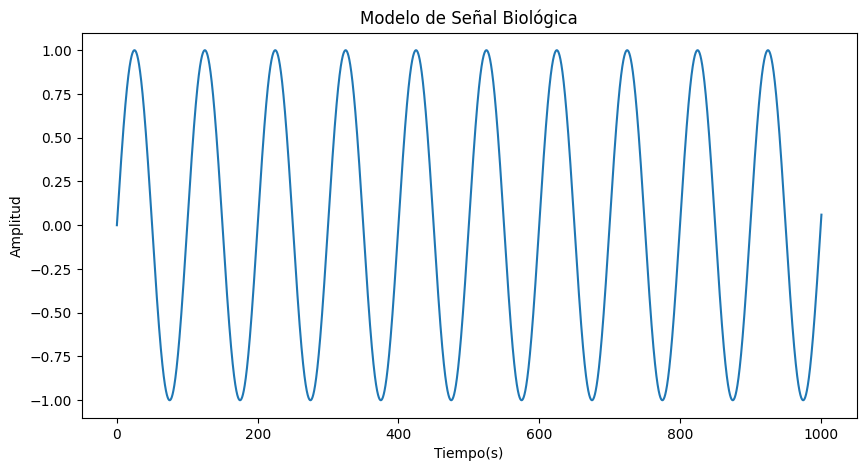

In [231]:
Fo=0.01 # Frecuencia fundamental de la señal
Fs=25 # Frecuencia de muestro
n=np.arange(0,1001,1/Fs) # Tiempo
x_e=np.sin(2*np.pi*Fo*n) # Potencial

#Graficamos
plt.figure(figsize=(10, 5))
plt.plot(n,x_e)
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Modelo de Señal Biológica")
plt.show()


El paso de la señal biológica a través de los distintos tejidos provoca una atenuación de la amplitud y un retraso temporal. Estos factores impactan la señal generada, a la que se suma el ruido gaussiano introducido por el sistema electrónico de registro. La señal registrada se expresa de la siguiente manera:

                                   
                                    y_e(n)= α x_e(n-D) + w(n)


Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y w(n) representa el ruido generado por la electrónica de los sistemas de adquisición.

Para modelar la señal y_e, se genera
w(n) como una secuencia de ruido gaussiano utilizando la función np.random.normal, con una media de cero y una varianza de σ^2=0.01. Además, se establecen los parámetros α=0.8 y un retraso D=15 muestras.



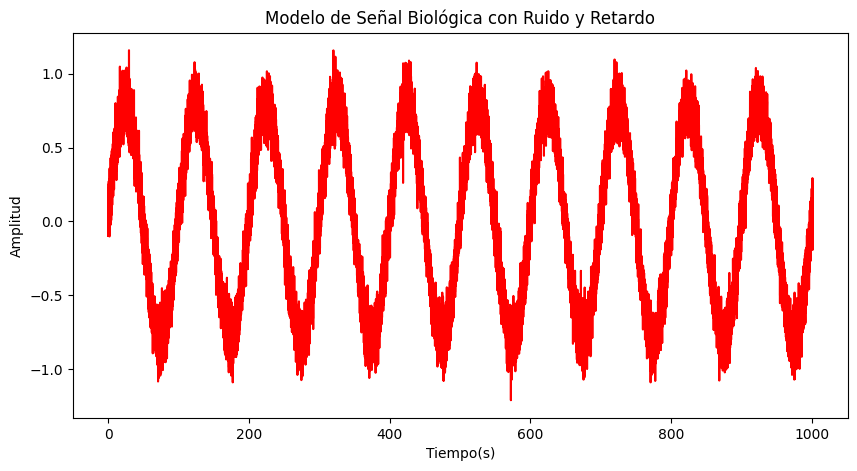

In [232]:
Fo=0.01 # Frecuencia fundamental
Fs=25 # Frecuencia de muestreo
alfa=0.8 # Atenuación
D=15 # Retardo inducido en la adquisición
var=0.01 # Varianza de ruido
media=0 # Media del ruido
n=np.arange(0,1001,1/Fs) # Tiempo
y=np.sin(2*np.pi*Fo*(n+D/Fs)) # Potencial con retraso
w=np.random.normal(media,np.sqrt(var),len(n)) # Rudio gaussiano
y_e=alfa*y+w # Señal adquirida con ruido y retardo

# Graficamos
plt.figure(figsize=(10, 5))
plt.plot(n,y_e,color='red')
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Modelo de Señal Biológica con Ruido y Retardo")
plt.show()

Comparamos el modelo de la señal biológica original con la señal adquirida, que incluye ruido y retardo.

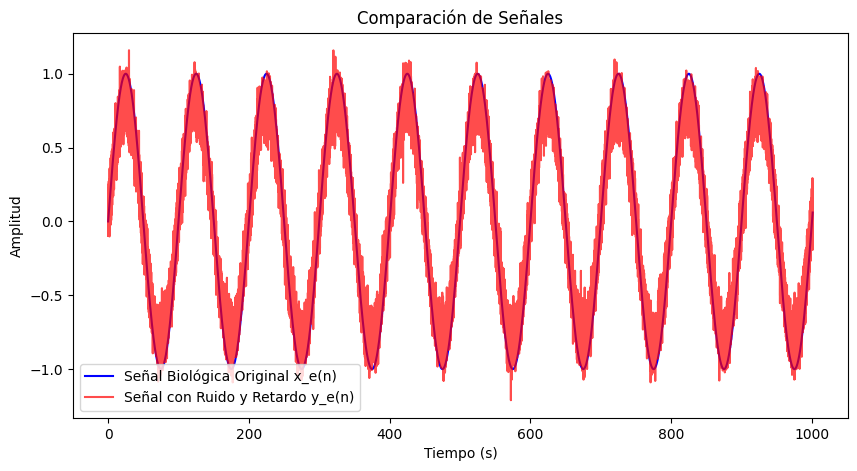

In [233]:
plt.figure(figsize=(10, 5))
plt.plot(n, x_e, label='Señal Biológica Original x_e(n)', color='blue')
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='red', alpha=0.7)
plt.title('Comparación de Señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

**1.2  Diseño de un filtro**

***Filtro FIR Pasa-Bajas***

Se diseña un filtro FIR pasa-bajas para la señal y_e(n), con una frecuencia de corte de 1.25 muestras/s y un orden de 30, utilizando la función firwin.

> Añadir blockquote



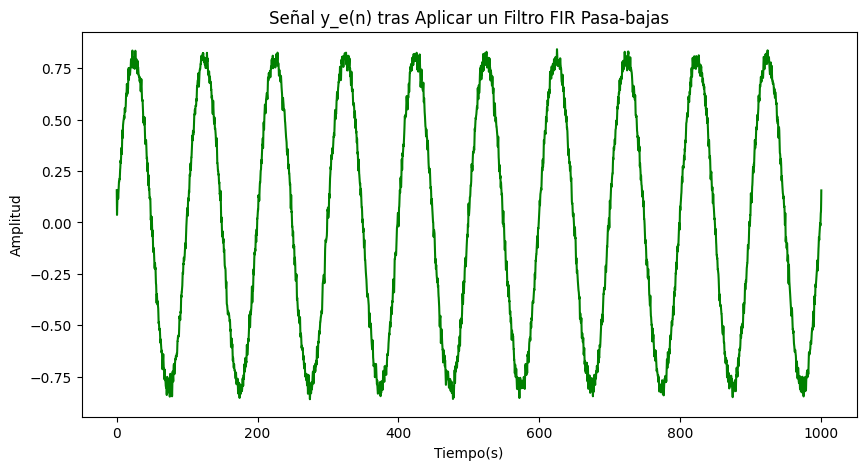

In [234]:
order=30 # Orden
Fc= 1.25 # Frecuencia de corte
nyquist=Fs/2 # Frecuencia de nyquist
wn= Fc/nyquist # Frecuencia de corte normalizada respecto a nyquist
lowpass=signal.firwin(order+1,wn,pass_zero="lowpass",window="hamming") # Filtro pasa-ajas
y_e_low=signal.filtfilt(b=lowpass,a=1,x=y_e) # Aplicación del filtro

# Graficamos
plt.figure(figsize=(10, 5))
plt.plot(n,y_e_low,color='green')
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Señal y_e(n) tras Aplicar un Filtro FIR Pasa-bajas")

plt.show()


***Filtro FIR Pasa-Altas***

Para implementar un filtro pasa-altas, es necesario modificar el argumento "pass_zero" a "highpass" en la función "signal.firwin". Además, se debe ajustar la frecuencia de corte a 1.25 muestras/s, y se realizar una prueba adicional con una frecuencia de corte de 7.5 muestras/s.

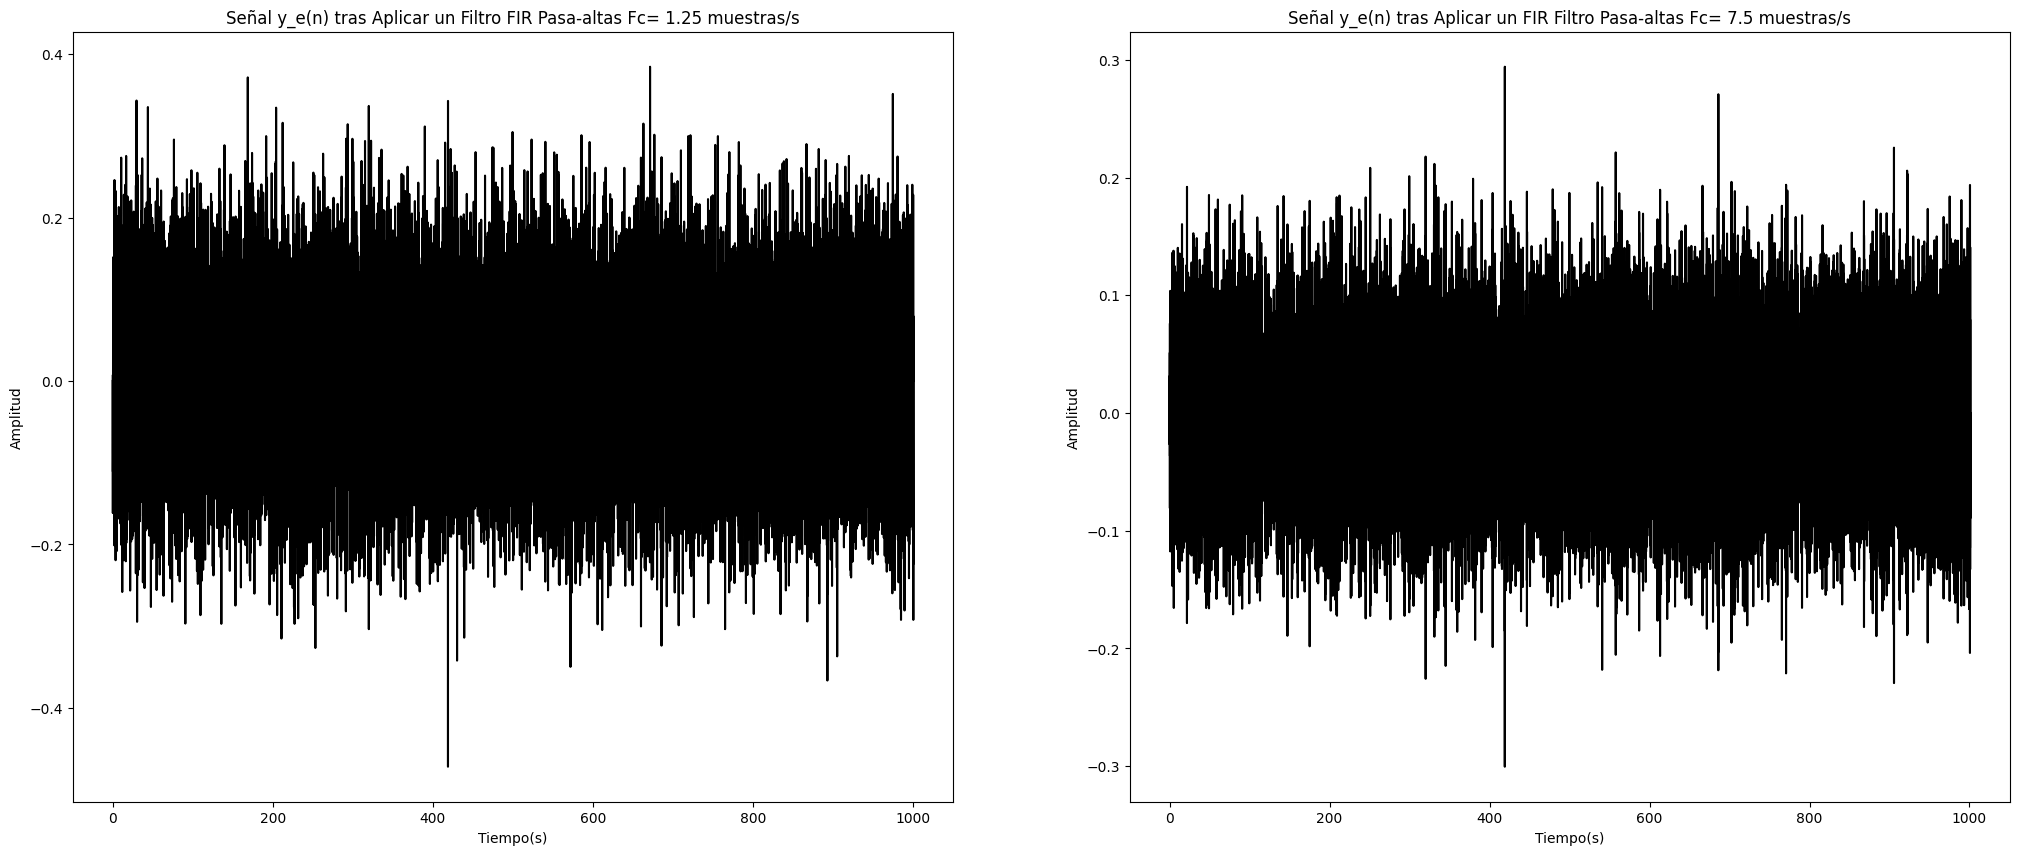

In [235]:
# Filtro pasa-altas con frecuencia de corte igual a 1.25 muestras/s.

plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)

order=30 # Orden
Fc1= 1.25 # Frecuencia de corte
nyquist=Fs / 2 # Frecuencia de nyquist
wn1= Fc1 / nyquist # Frecuencia de corte normalizada respecto a nyquist
highpass1 = signal.firwin(order+1,wn1,pass_zero="highpass",window="hamming") #Filtro pasa-bajas
y_e_high1 = signal.filtfilt(b=highpass1,a=1,x=y_e) # Aplicación del filtro

# Graficamos
plt.plot(n,y_e_high1,color='black')
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Señal y_e(n) tras Aplicar un Filtro FIR Pasa-altas Fc= 1.25 muestras/s")

# Filtro pasa-altas con frecuencia de corte igual a 7.25 muestras/s.

plt.subplot(1,2,2)
order=30 # Orden
Fc2= 7.5 # Frecuencia de corte
nyquist=Fs/2 # Frecuencia de nyquist
wn2= Fc2/nyquist # Frecuencia de corte normalizada respecto a nyquist
highpass2= signal.firwin(order+1,wn2,pass_zero="highpass",window="hamming") #Filtor pasa-bajas
y_e_high2= signal.filtfilt(b=highpass2,a=1,x=y_e) # Aplicación del filtro
plt.plot(n,y_e_high2,color='black')
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Señal y_e(n) tras Aplicar un FIR Filtro Pasa-altas Fc= 7.5 muestras/s")

plt.show()





***Filtro FIR Pasa-Banda***

A continuación, se implementa un filtro pasa-banda, para lo cual es necesario establecer las frecuencias de corte inferior y superior en 1.25 muestras/s y 7.25 muestras/s, respectivamente. Además, se debe modificar el argumento pass_zero a False en la función signal.firwin. Esto garantizará que se atenúen las frecuencias cercanas a cero y que solo se permitan pasar aquellas que se encuentren dentro del rango definido por las frecuencias de corte inferior y superior.

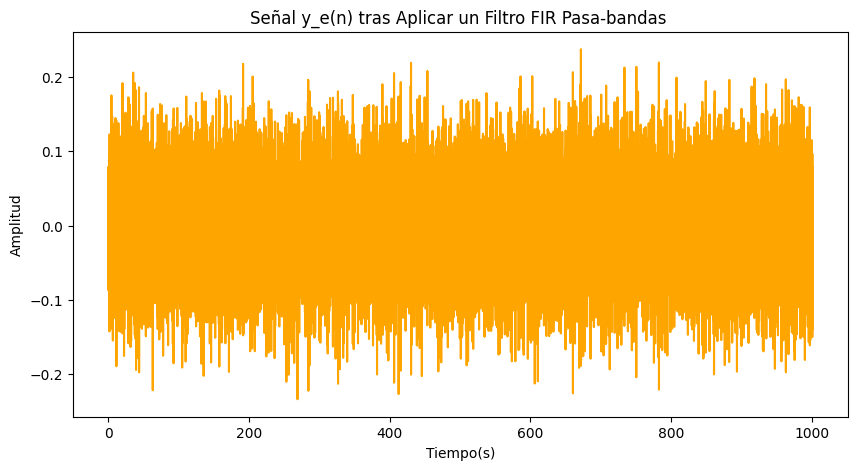

In [236]:
order = 30  # Orden
Fci = 1.25  # Frecuencia de corte inferior
Fcs = 7.25  # Frecuencia de corte superior
nyquist = Fs / 2  # Frecuencia de nyquist
wni = Fci/ nyquist  # Frecuencia de corte normalizada inferior
wns = Fcs / nyquist  # Frecuencia de corte normalizada superior

# Filtro pasa-bandas
bandpass = signal.firwin(order + 1, [wni, wns], pass_zero=False, window="hamming")

# Aplicación del filtro
y_e_bandpass = signal.filtfilt(b= bandpass, a=1, x=y_e)  # Aplicación del filtro

# Graficamos
plt.figure(figsize=(10, 5))
plt.plot(n, y_e_bandpass, color='orange')
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Señal y_e(n) tras Aplicar un Filtro FIR Pasa-bandas ")
plt.show()

***Comparación de Filtros FIR: Pasa-Bajas, Pasa-Altas y Pasa-Bandas***

---



---



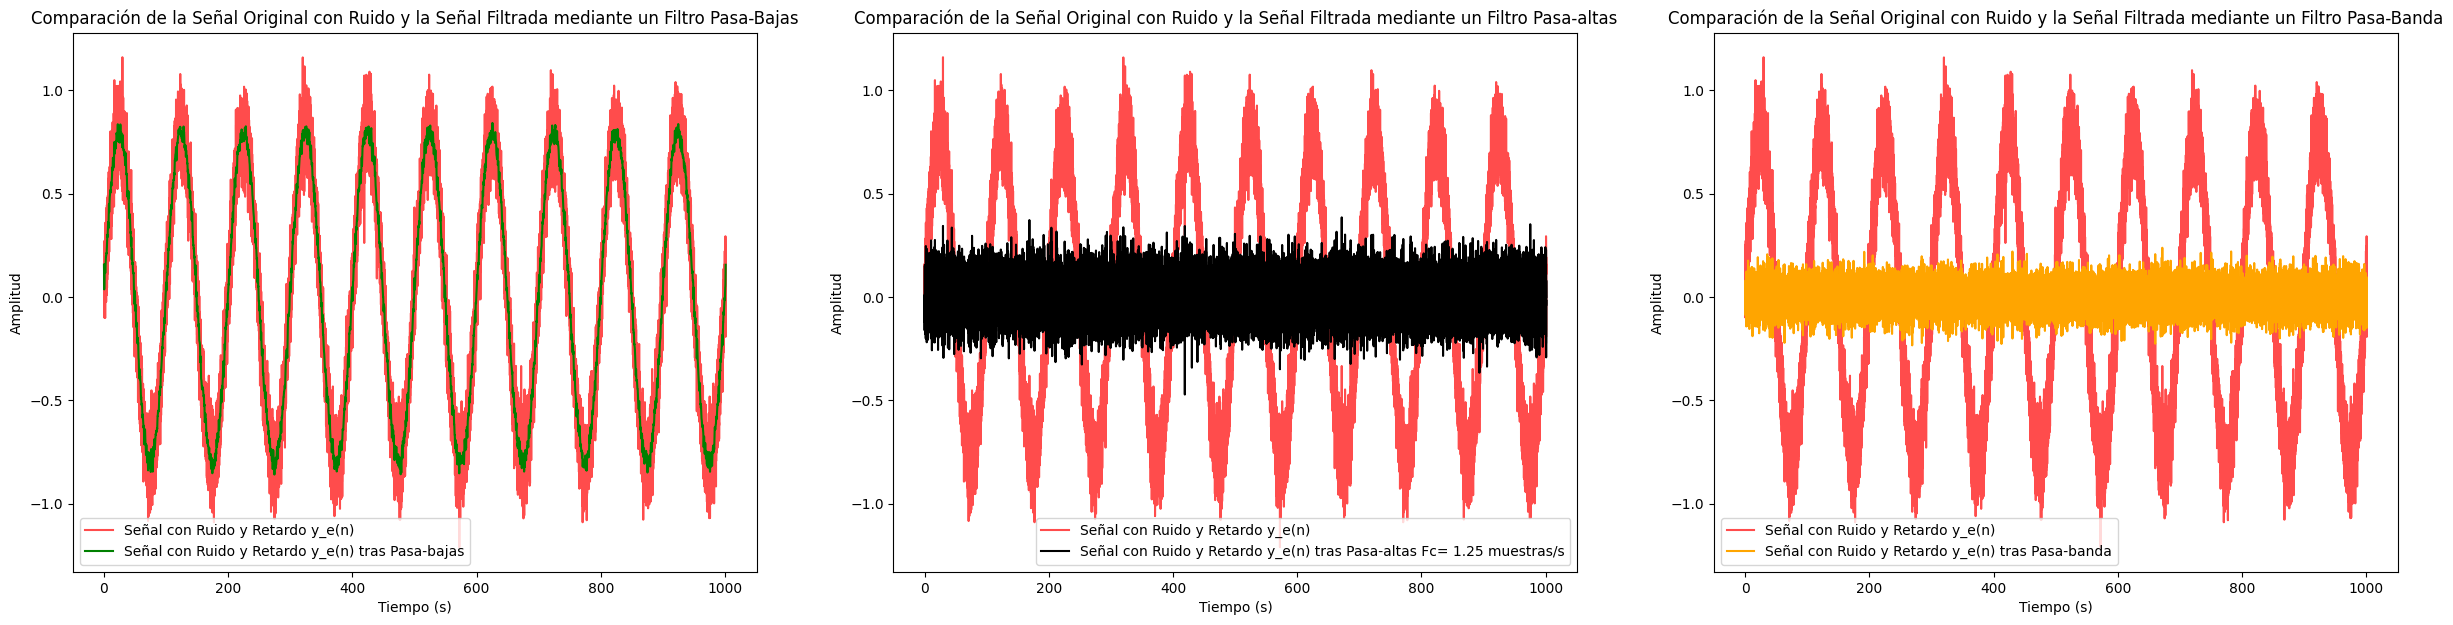

In [237]:
plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='red', alpha=0.7)
plt.plot(n, y_e_low, label='Señal con Ruido y Retardo y_e(n) tras Pasa-bajas', color='green')
plt.title('Comparación de la Señal Original con Ruido y la Señal Filtrada mediante un Filtro Pasa-Bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(1,3,2)

plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='red', alpha=0.7)
plt.plot(n, y_e_high1, label='Señal con Ruido y Retardo y_e(n) tras Pasa-altas Fc= 1.25 muestras/s', color='black')
plt.title('Comparación de la Señal Original con Ruido y la Señal Filtrada mediante un Filtro Pasa-altas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(1,3,3)

plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='red', alpha=0.7)
plt.plot(n, y_e_bandpass, label='Señal con Ruido y Retardo y_e(n) tras Pasa-banda', color='orange')
plt.title('Comparación de la Señal Original con Ruido y la Señal Filtrada mediante un Filtro Pasa-Banda')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()



plt.show()


Al comparar la señal de entrada y salida para los filtros pasa baja, pasa altas y pasa banda, se observa una menor atenuación de la señal ingresada en el filtro pasa bajas, con una frecuencia de corte de 1.25 muestras/seg. Esto era esperado, ya que la señal de entrada tiene una frecuencia fundamental de 0.01 Hz, por lo cual la mayor parte de su potencia se concentra en frecuencias muy bajas.

Por otro lado, en los resultados obtenidos con los filtros pasa altas y pasa banda, se observa una señal de menor amplitud y sin una dinámica senoidal. Esto se debe a que el rango de frecuencias de ambos filtros no incluye la frecuencia fundamental de la señal de entrada, donde se concentra la mayor potencia. La señal que se observa en estos filtros es, en su mayoría, el ruido gaussiano presente en la señal de entrada.

Además, se puede notar que la amplitud de la señal de salida del filtro pasa banda es menor en comparación del filtro pasa altas, ya que este filtro incluye una frecuencia de corte superior de hasta 7.5 Hz, mientras que el filtro pasa altas permite un rango de frecuencias más amplio, resultando en una menor atenuación de las altas frecuencias.

***Filtro IIR Pasa-Bajas***


Se diseña un filtro pasa bajas para la señal y_e(n), con los mismos datos usados en el diseño del filtro IIR.

Se diseña un filtro IIR pasa-bajas para la señal y_e(n), con una frecuencia de corte de 1.25 muestras/s y un orden de 30, utilizando la función firwin.



<Figure size 2000x800 with 0 Axes>

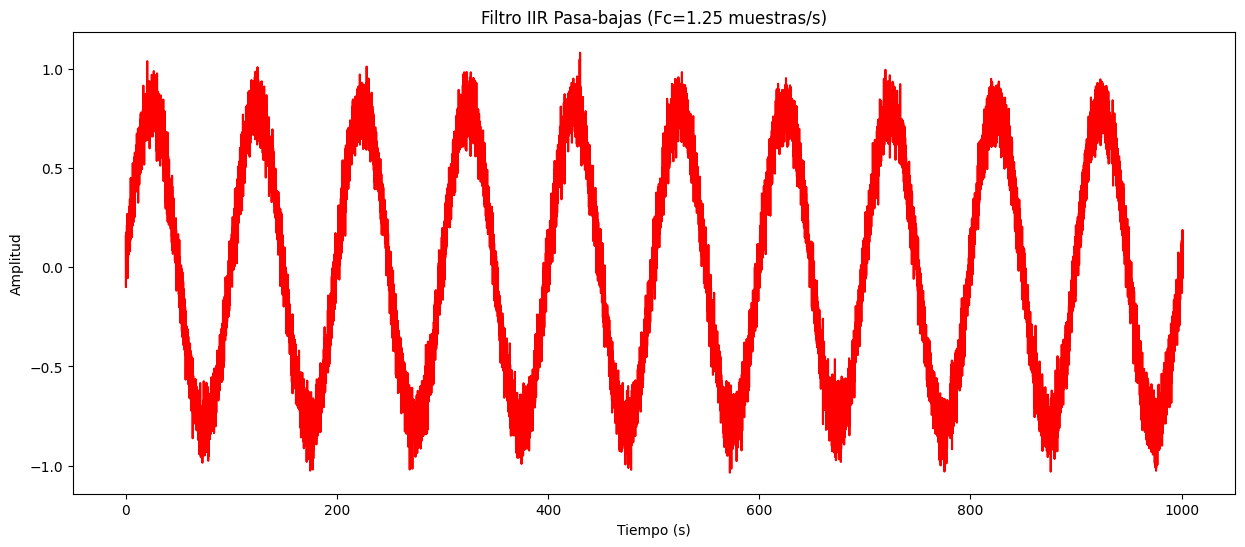

In [238]:
import scipy
nyquist = Fs / 2
order = 30
plt.figure(figsize=(20, 8))

# Filtro IIR pasa-bajas (Fc = 1.25 muestras/s)
Fc_low = 7.5
wn_low = Fc_low / nyquist
b_low, a_low = signal.iirfilter(order, wn_low, btype='low', ftype='butter')
y_e_low= signal.filtfilt(b=b_low,a=a_low,x=y_e)


plt.figure(figsize=(15, 6))
plt.plot(n, y_e_low, color='red')

plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bajas (Fc=1.25 muestras/s)")
plt.show()

***Filtro IIR Pasa-Altas***


Para implementar un filtro pasa-altas, es necesario modificar el argumento "btype" a "highpass" en la función "signal.iirfilter". Además, se debe ajustar la frecuencia de corte a 1.25 muestras/s, y se realizar una prueba adicional con una frecuencia de corte de 7.5 muestras/s.


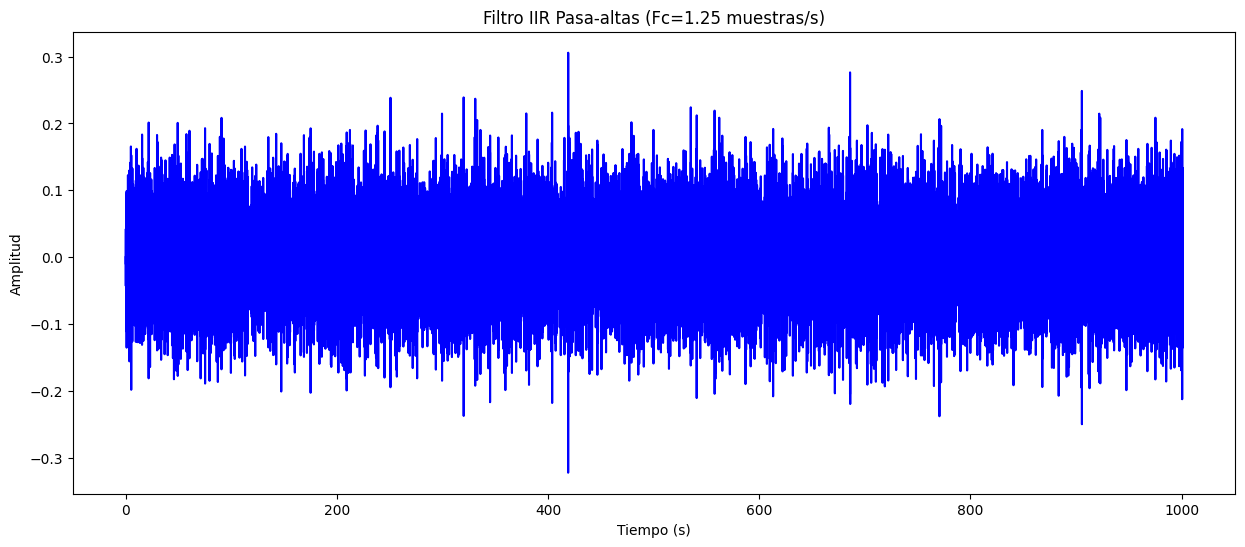

In [239]:
order = 30
Fc_high = 7.5
wn_high = Fc_high / nyquist
b_high, a_high = signal.iirfilter(order, wn_high, btype='high', ftype='butter')
y_e_high = signal.filtfilt(b=b_high, a=a_high, x=y_e)
#y_e_high1=scipy.signal.lfilter(b_high, a_high, y_e)

plt.figure(figsize=(15, 6))
plt.plot(n, y_e_high, color='blue')
#plt.plot(n,y_e_high1,color='red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-altas (Fc=1.25 muestras/s)")
plt.show()

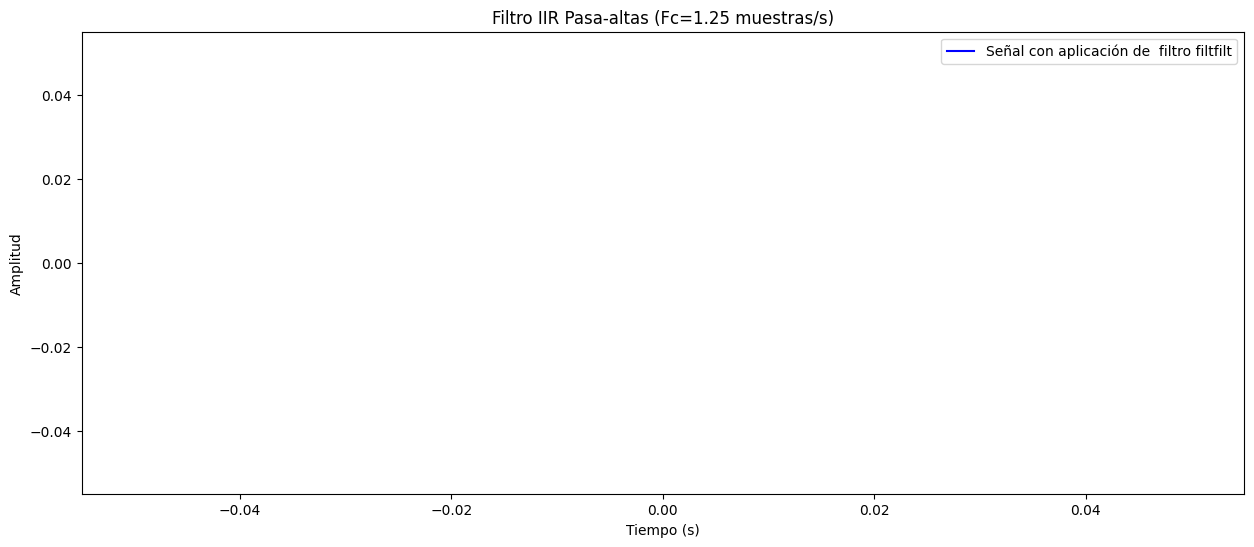

In [267]:
order = 30
Fc_high = 1.25
wn_high = Fc_high / nyquist
b_high, a_high = signal.iirfilter(order, wn_high, btype='high', ftype='butter')
y_e_high = signal.filtfilt(b=b_high, a=a_high, x=y_e)

plt.figure(figsize=(15, 6))
plt.plot(n, y_e_high,label='Señal con aplicación de  filtro filtfilt', color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-altas (Fc=1.25 muestras/s)")
plt.legend()
plt.show()

***Filtro IIR Pasa-Bandas***


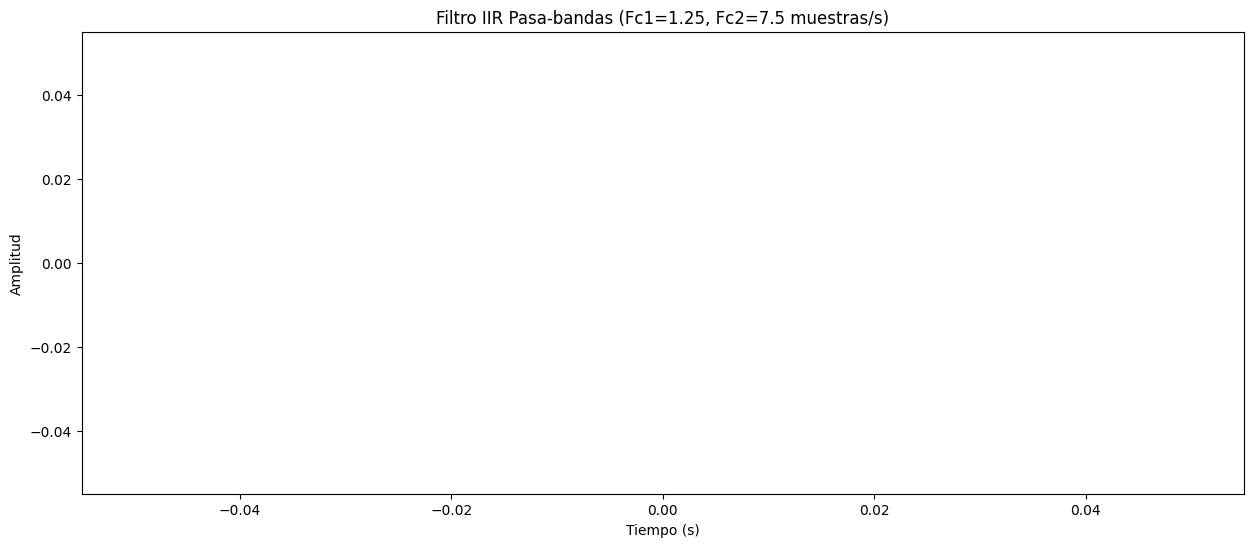

In [263]:
order = 30
Fc_band = [1.25, 7.5]
wn_band = [f / nyquist for f in Fc_band]
b_band, a_band = signal.iirfilter(order, wn_band, btype='bandpass', ftype='butter')
y_e_band = signal.filtfilt(b=b_band, a=a_band, x=y_e)

plt.figure(figsize=(15, 6))
plt.plot(n, y_e_band, color='black')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bandas (Fc1=1.25, Fc2=7.5 muestras/s)")
plt.show()

***Comparación de Filtros IIR: Pasa-Bajas, Pasa-Altas y Pasa-Bandas***

---



---



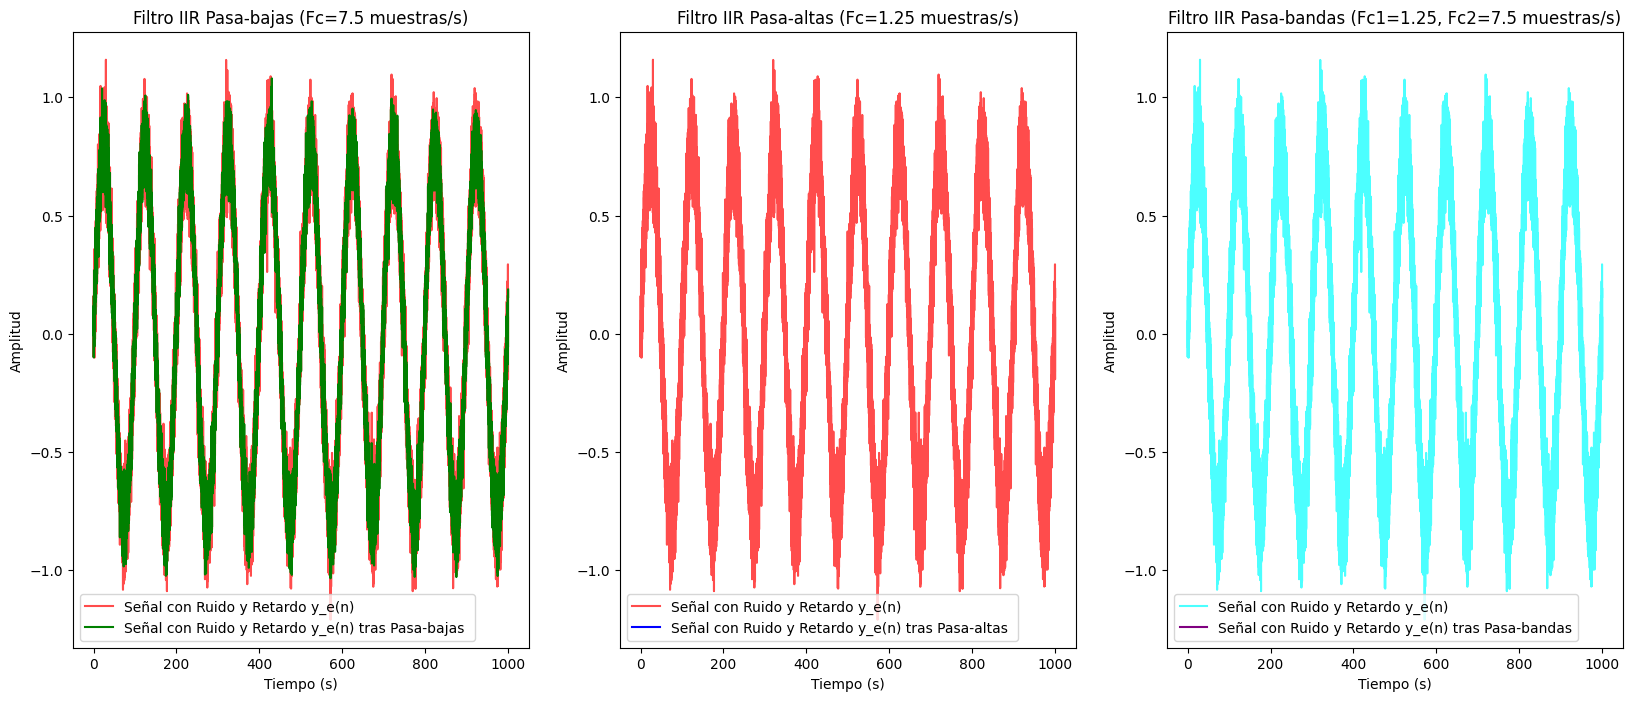

In [264]:

plt.figure(figsize=(20, 8))

# Filtro IIR pasa-bajas (Fc = 1.25 muestras/s)
plt.subplot(1, 3, 1)
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='red', alpha=0.7)
plt.plot(n, y_e_low, label='Señal con Ruido y Retardo y_e(n) tras Pasa-bajas ',color='green')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bajas (Fc=7.5 muestras/s)")
plt.legend()


# Filtro IIR pasa-altas (Fc = 7.5 muestras/s)
plt.subplot(1, 3, 2)
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='red', alpha=0.7)
plt.plot(n, y_e_high,label='Señal con Ruido y Retardo y_e(n) tras Pasa-altas ', color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-altas (Fc=1.25 muestras/s)")
plt.legend()



# Filtro IIR pasa-bandas (Fc1 = 1.25 muestras/s, Fc2 = 7.5 muestras/s)


plt.subplot(1, 3, 3)
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='cyan', alpha=0.7)
plt.plot(n, y_e_band, label='Señal con Ruido y Retardo y_e(n) tras Pasa-bandas',color='purple')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bandas (Fc1=1.25, Fc2=7.5 muestras/s)")
plt.legend()


plt.show()

Al analizar las señales, se observa que el filtro pasa bajas atenúa la señal adecuadamente. Sin embargo, en el caso del filtro pasa altas, debido a que la frecuencia fundamental es muy baja y a que se utiliza una frecuencia de corte de 1.25, este filtro IIR podría estar atenuando la señal en exceso, haciéndola casi imperceptible. Además, el orden elevado del filtro afecta la estabilidad de la señal, provocando atenuaciones pronunciadas. En general, los filtros IIR presentan limitaciones en frecuencias muy cercanas a cero o con órdenes altos, lo que puede afectar su estabilidad y rendimiento en estas condiciones.

Para poder observar mejores resultados se implementa de  nuevo este filtro pero esta vez con un orden mucho menor que nos permita apreciar de mejor manera la implementación del filtro[1][2].

**Diseño de filtro IIR con menor orden**

**Filtro pasa bajas**

<Figure size 2000x800 with 0 Axes>

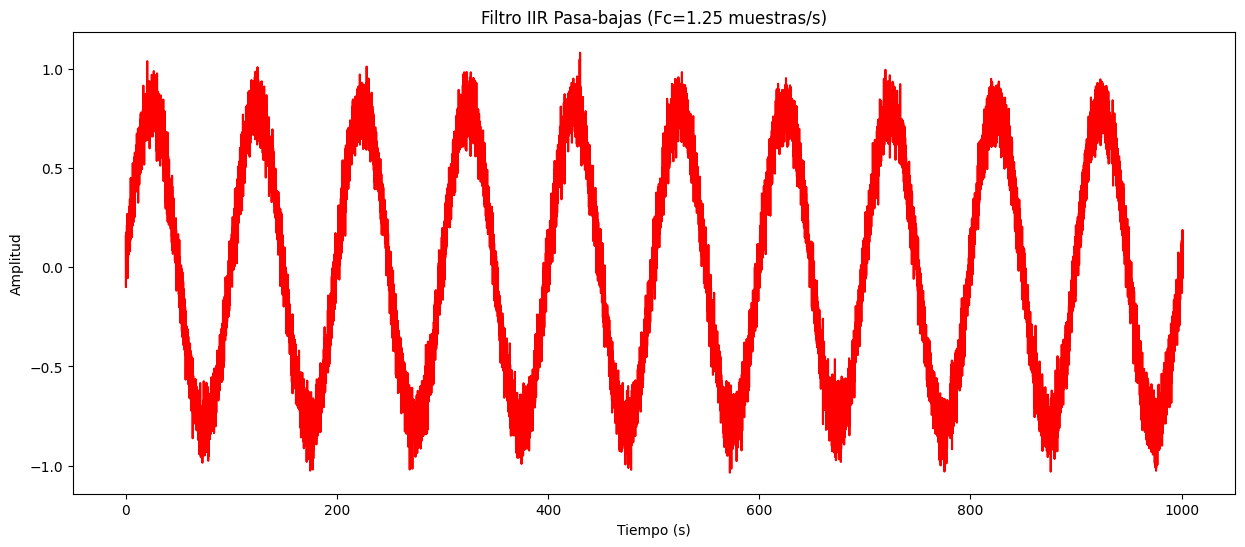

In [269]:
import scipy
nyquist = Fs / 2
order1 = 6
plt.figure(figsize=(20, 8))

# Filtro IIR pasa-bajas (Fc = 1.25 muestras/s)
Fc_low1 = 7.5
wn_low1 = Fc_low1 / nyquist
b_low1, a_low1 = signal.iirfilter(order, wn_low1, btype='low', ftype='butter')
y_e_low1= signal.filtfilt(b=b_low1,a=a_low1,x=y_e)


plt.figure(figsize=(15, 6))
plt.plot(n, y_e_low1, color='red')

plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bajas (Fc=1.25 muestras/s)")
plt.show()

**Filtro pasa altas**

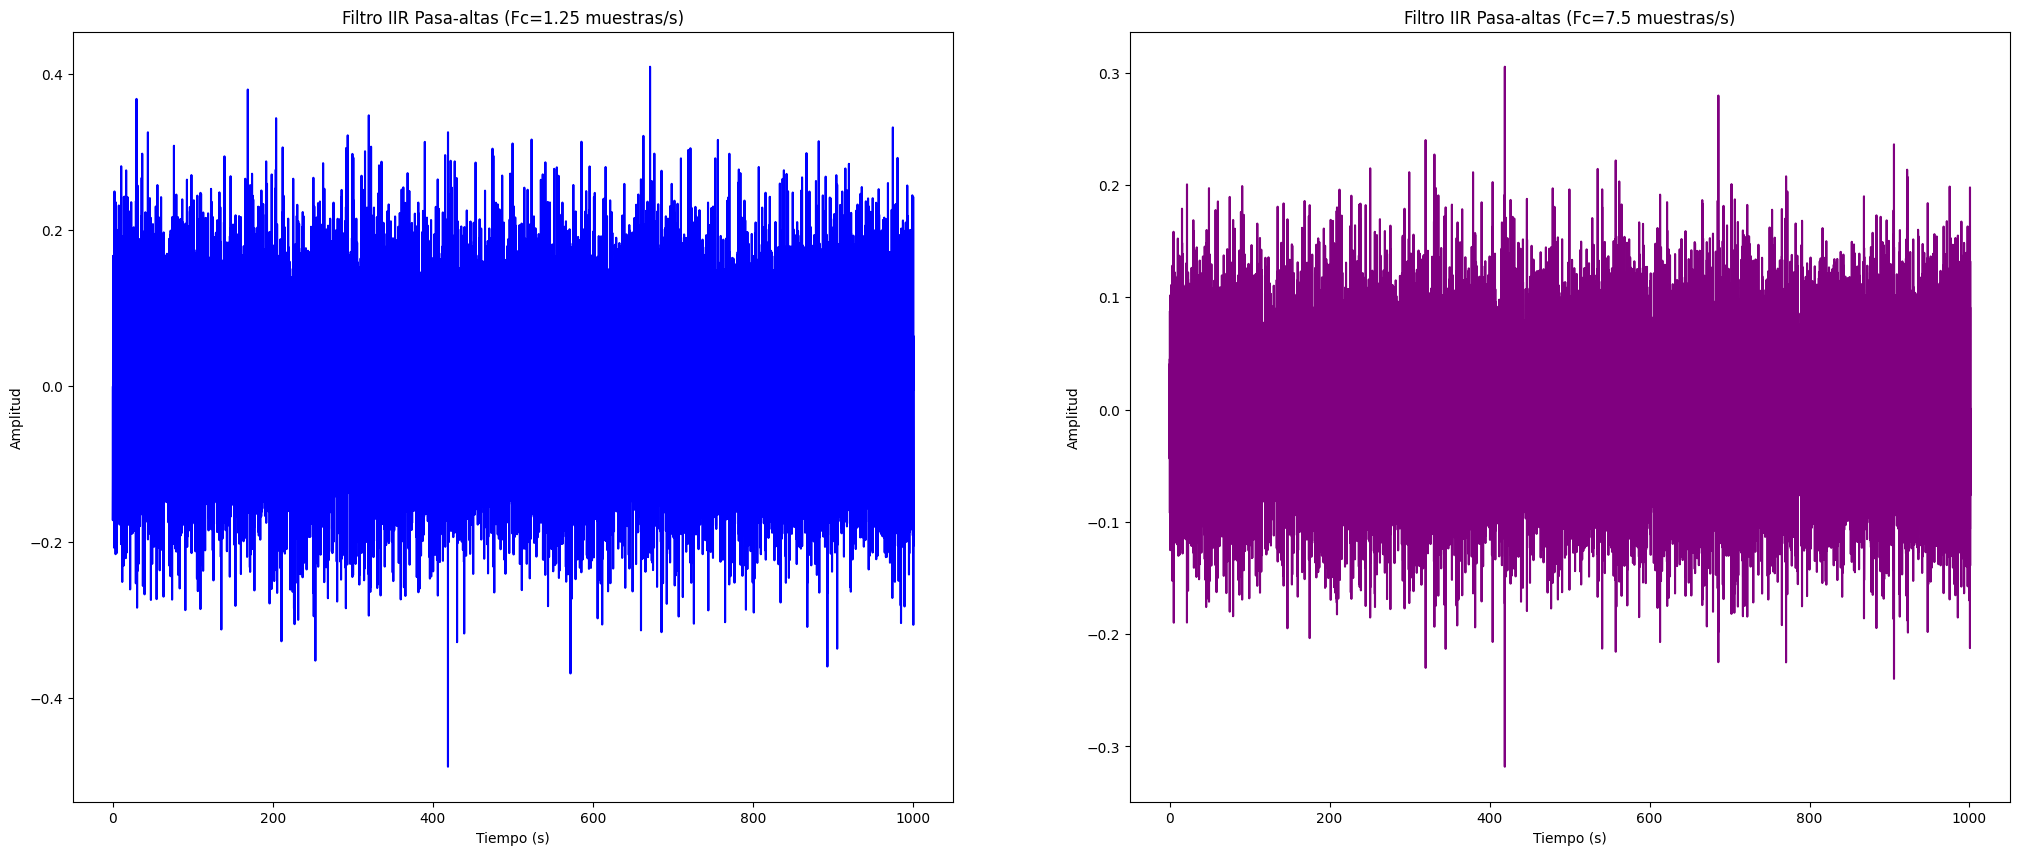

In [278]:
order1 = 6
Fc_high1 = 1.25
wn_high1 = Fc_high1 / nyquist
b_high1, a_high1 = signal.iirfilter(order1, wn_high1, btype='high', ftype='butter')
y_e_high1 = signal.filtfilt(b=b_high1, a=a_high1, x=y_e)
plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)
plt.plot(n, y_e_high1, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-altas (Fc=1.25 muestras/s)")

order1 = 6
Fc_high2 = 7.5
wn_high2 = Fc_high2 / nyquist
b_high2, a_high2 = signal.iirfilter(order1, wn_high2, btype='high', ftype='butter')
y_e_high2 = signal.filtfilt(b=b_high2, a=a_high2, x=y_e)

plt.subplot(1,2,2)
plt.plot(n, y_e_high2, color='purple')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-altas (Fc=7.5 muestras/s)")
plt.show()

**Filtro pasabandas**

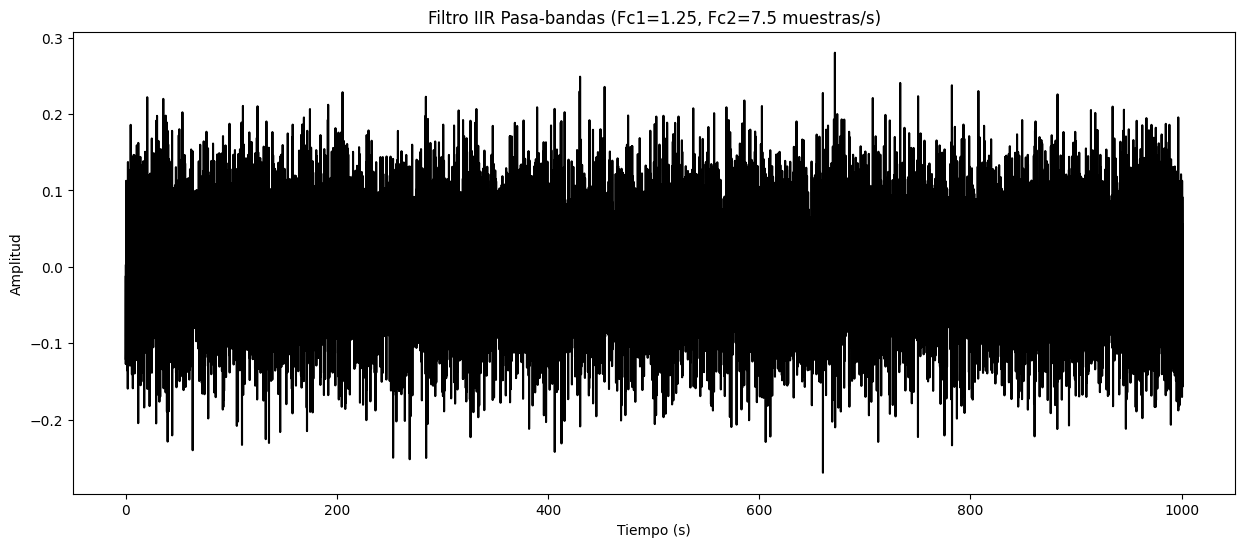

In [279]:
order1 = 6
Fc_band1 = [1.25, 7.5]
wn_band1 = [f / nyquist for f in Fc_band1]
b_band1, a_band1 = signal.iirfilter(order1, wn_band1, btype='bandpass', ftype='butter')
y_e_band1 = signal.filtfilt(b=b_band1, a=a_band1, x=y_e)

plt.figure(figsize=(15, 6))
plt.plot(n, y_e_band1, color='black')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bandas (Fc1=1.25, Fc2=7.5 muestras/s)")
plt.show()

**Comparación filtro IIR con orden menor **

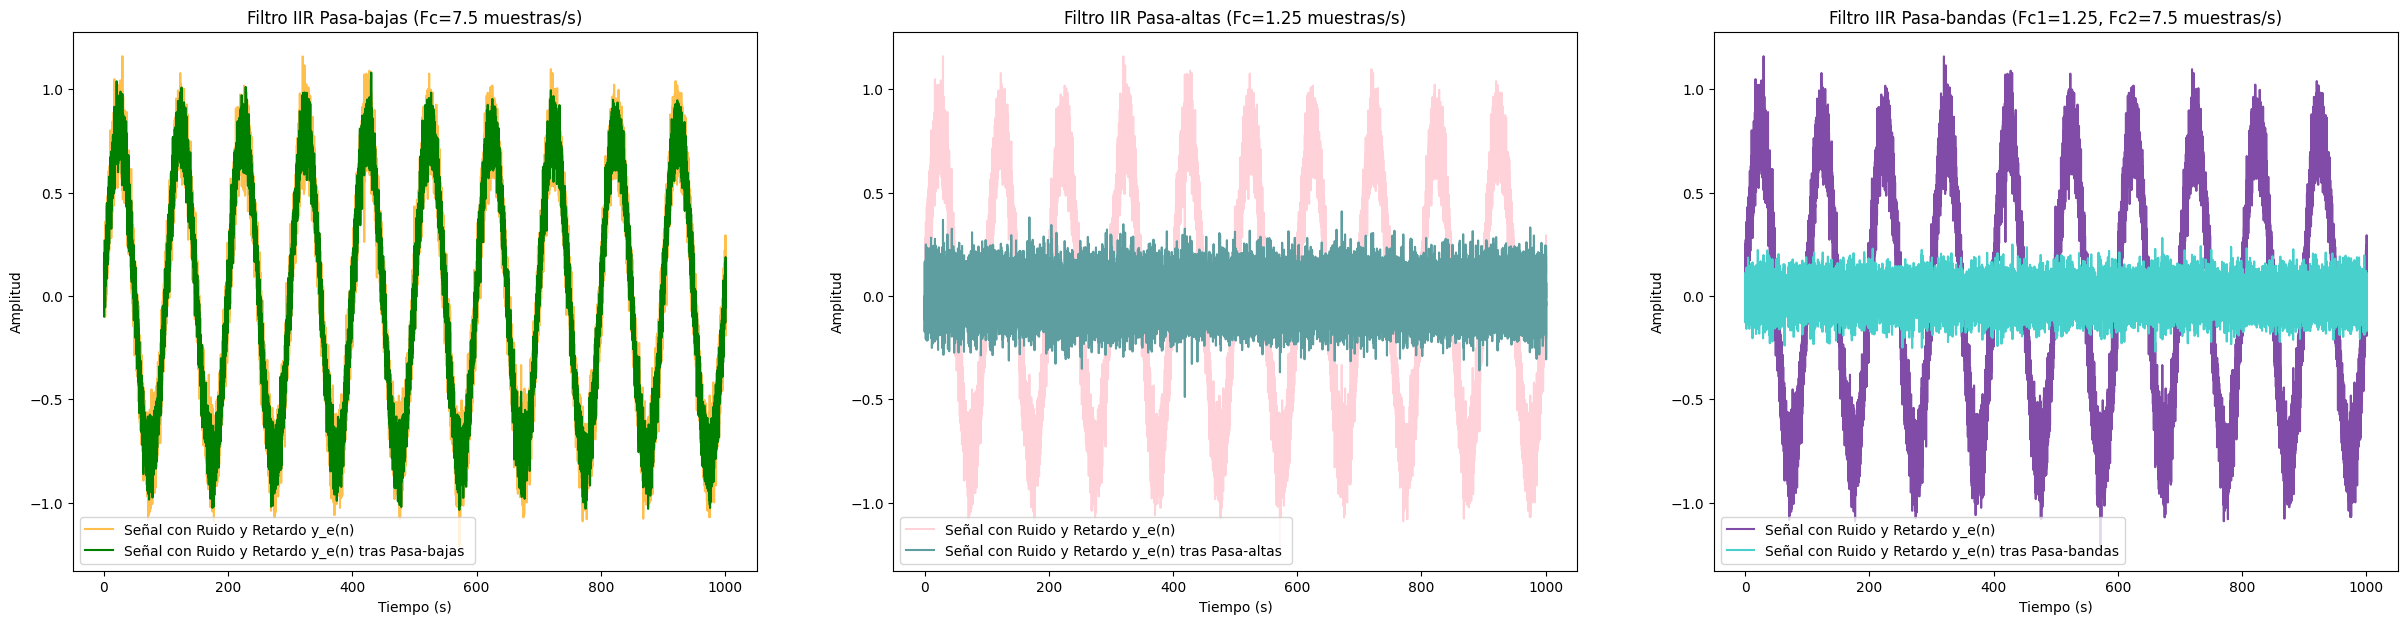

In [294]:

plt.figure(figsize=(30, 7))


# Filtro IIR pasa-bajas (Fc = 1.25 muestras/s)
plt.subplot(1, 3, 1)
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='orange', alpha=0.7)
plt.plot(n, y_e_low1, label='Señal con Ruido y Retardo y_e(n) tras Pasa-bajas ',color='green')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bajas (Fc=7.5 muestras/s)")
plt.legend()


# Filtro IIR pasa-altas (Fc = 7.5 muestras/s)
plt.subplot(1, 3, 2)
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='pink', alpha=0.7)
plt.plot(n, y_e_high1,label='Señal con Ruido y Retardo y_e(n) tras Pasa-altas ', color='cadetblue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-altas (Fc=1.25 muestras/s)")
plt.legend()



# Filtro IIR pasa-bandas (Fc1 = 1.25 muestras/s, Fc2 = 7.5 muestras/s)


plt.subplot(1, 3, 3)
plt.plot(n, y_e, label='Señal con Ruido y Retardo y_e(n)', color='indigo', alpha=0.7)
plt.plot(n, y_e_band1, label='Señal con Ruido y Retardo y_e(n) tras Pasa-bandas',color='mediumturquoise')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtro IIR Pasa-bandas (Fc1=1.25, Fc2=7.5 muestras/s)")
plt.legend()


plt.show()

Al ajustar el orden del filtro, las gráficas muestran mejores resultados, sin distorsiones significativas ni ruido de alta frecuencia. Esto se debe a que el filtro, con este orden, captura de manera efectiva los componentes de baja frecuencia.

En el caso del filtro pasa bajas, las señales por debajo de 7.5 conservan su forma original. Para el filtro pasa altas con frecuencia de corte en 1.25, se atenúan las frecuencias más bajas de la señal original, aunque permanece un leve ruido residual debido a la conservación de los componentes de mayor frecuencia. Finalmente, el filtro pasa bandas permite el paso óptimo de frecuencias entre 1.25 y 7.5, atenuando la señal fuera de este rango y aislando eficazmente la frecuencia fundamental de la señal principal[1].

 **1.3 Filtrado**

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.

* · Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛)

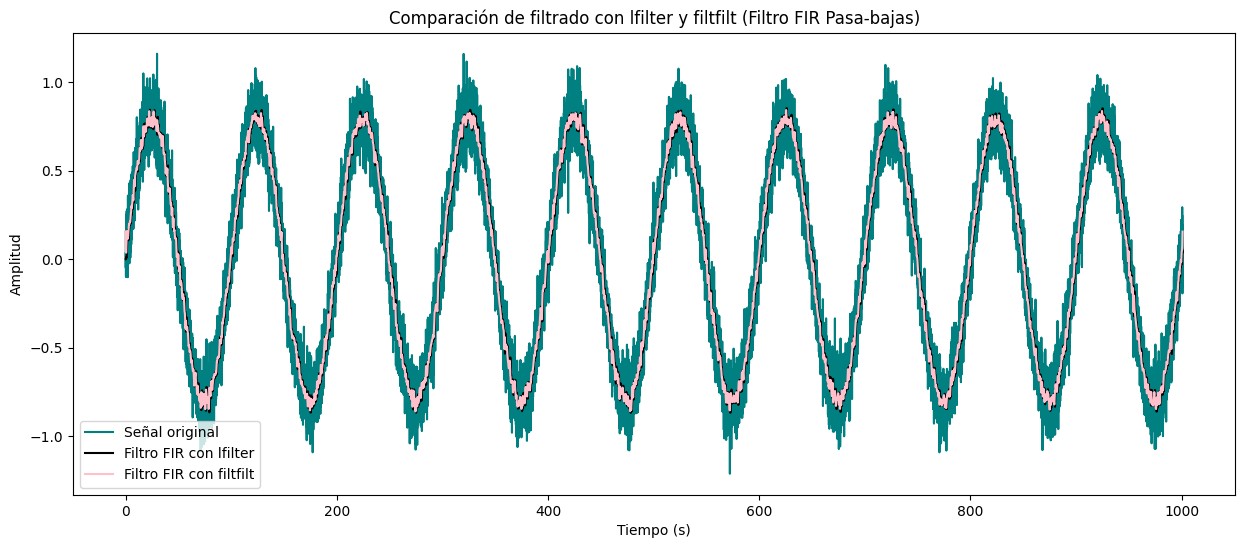

In [296]:
order = 30
Fc_low = 1.25  # Frecuencia de corte en Hz
nyquist = Fs / 2
wn_low = Fc_low / nyquist
lowpass_fir = signal.firwin(order + 1, wn_low, pass_zero="lowpass", window="hamming")

# Aplicación de los filtros con lfilter y filtfilt
y_e_lfilter = signal.lfilter(lowpass_fir, 1, y_e)  # Usando lfilter
y_e_filtfilt = signal.filtfilt(lowpass_fir, 1, y_e)  # Usando filtfilt

# Graficamos los resultados
plt.figure(figsize=(15, 6))
plt.plot(n, y_e, label="Señal original", color="teal")
plt.plot(n, y_e_lfilter, label="Filtro FIR con lfilter", color="black")
plt.plot(n, y_e_filtfilt, label="Filtro FIR con filtfilt", color="pink")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Comparación de filtrado con lfilter y filtfilt (Filtro FIR Pasa-bajas)")
plt.legend()
plt.show()

  
*   *¿Por qué se usa solo el numerador?*

En los filtros FIR, solo se requiere el numerador, que corresponde al vector de coeficientes \( b \), sin retroalimentación. El denominador, o vector de coeficientes \( a \), se establece como 1. Esto se debe a que un filtro FIR tiene una respuesta al impulso finita, lo que significa que su salida depende únicamente de las muestras de entrada y no de las salidas anteriores[3].

* *¿A qué hace referencia el numerador?*

En el filtro FIR el numerador contiene los coeficientes de las muestras de entrada. Estos coeficientes son  la respuesta de frecuencia del filtro, es decir  la atenuación o ganancia en diferentes frecuencias de la señal.

* *¿Se evidencian cambios al usar `lfilter` y `filtfilt`?*  

Sí. En el caso del `lfilter` su uso es en solo una dirección, introduciendo una distorsión de fase, lo que puede observarse en la grafica como  que la señal filtrada esté desfasada respecto a la original. Por otro lado en el caso de `filtfilt`,  aplica el filtro hacia adelante y hacia atrás, lo cual ayuda a compensar la distorsión de fase que sucede con el anterior, aunque  puede producir una mayor suavidad y a veces puede presentar más atenuación en los bordes de la señal debido a la doble aplicación del filtro[4][5][6].

* *¿Cómo se explica la falta de coincidencia?*  

La diferencia observada en las gráficas entre `lfilter` y `filtfilt` se debe a la distorsión de fase. Dado que `filtfilt` aplica el filtro en ambas direcciones, elimina el desfase que introduce `lfilter`. Esto convierte a `filtfilt` en un filtro de fase cero, lo que significa que no altera la fase de la señal mientras la filtra. Al mantener la fase en cero en todas las frecuencias, también se comporta como un filtro de fase lineal. Sin embargo, el filtrado hacia atrás en el tiempo requiere anticipar el futuro de la señal, por lo que `filtfilt` solo se usa para procesamiento fuera de línea y no para aplicaciones en tiempo real.

Por otro lado, `lfilter` realiza un filtrado causal directo en el tiempo, similar a un filtro electrónico real, y no puede ser de fase cero. Aunque podría ser de fase lineal en algunos casos (como en filtros FIR simétricos), normalmente no lo es, y suele introducir diferentes cantidades de retardo en distintas frecuencias[6].

* *¿Es adecuado el orden del filtro usado?*  

En el filtro FIR, es adecuado el uso de un orden más alto que puede mejorar la rspuesta de la frecuencia entregandola de modo más precisa  y  ademas le agrega una  atenuación en la banda de corte sea más definida. Aunquepor otro lado si se toma  un orden muy alto aumenta la complejidad computacional y puede resultar en una señal sobre-suavizada cuando se aplica `filtfilt`. En este caso, el orden 30 es un equilibrio adecuado para este caso que se uso una frecuencia de corte de 7.5 Hz, pero podría ajustarse en función de los requisitos específicos del tipo de filtro que se use o de lo que se desea obtener con este filtrado.




*   Prueba con filtro IIR




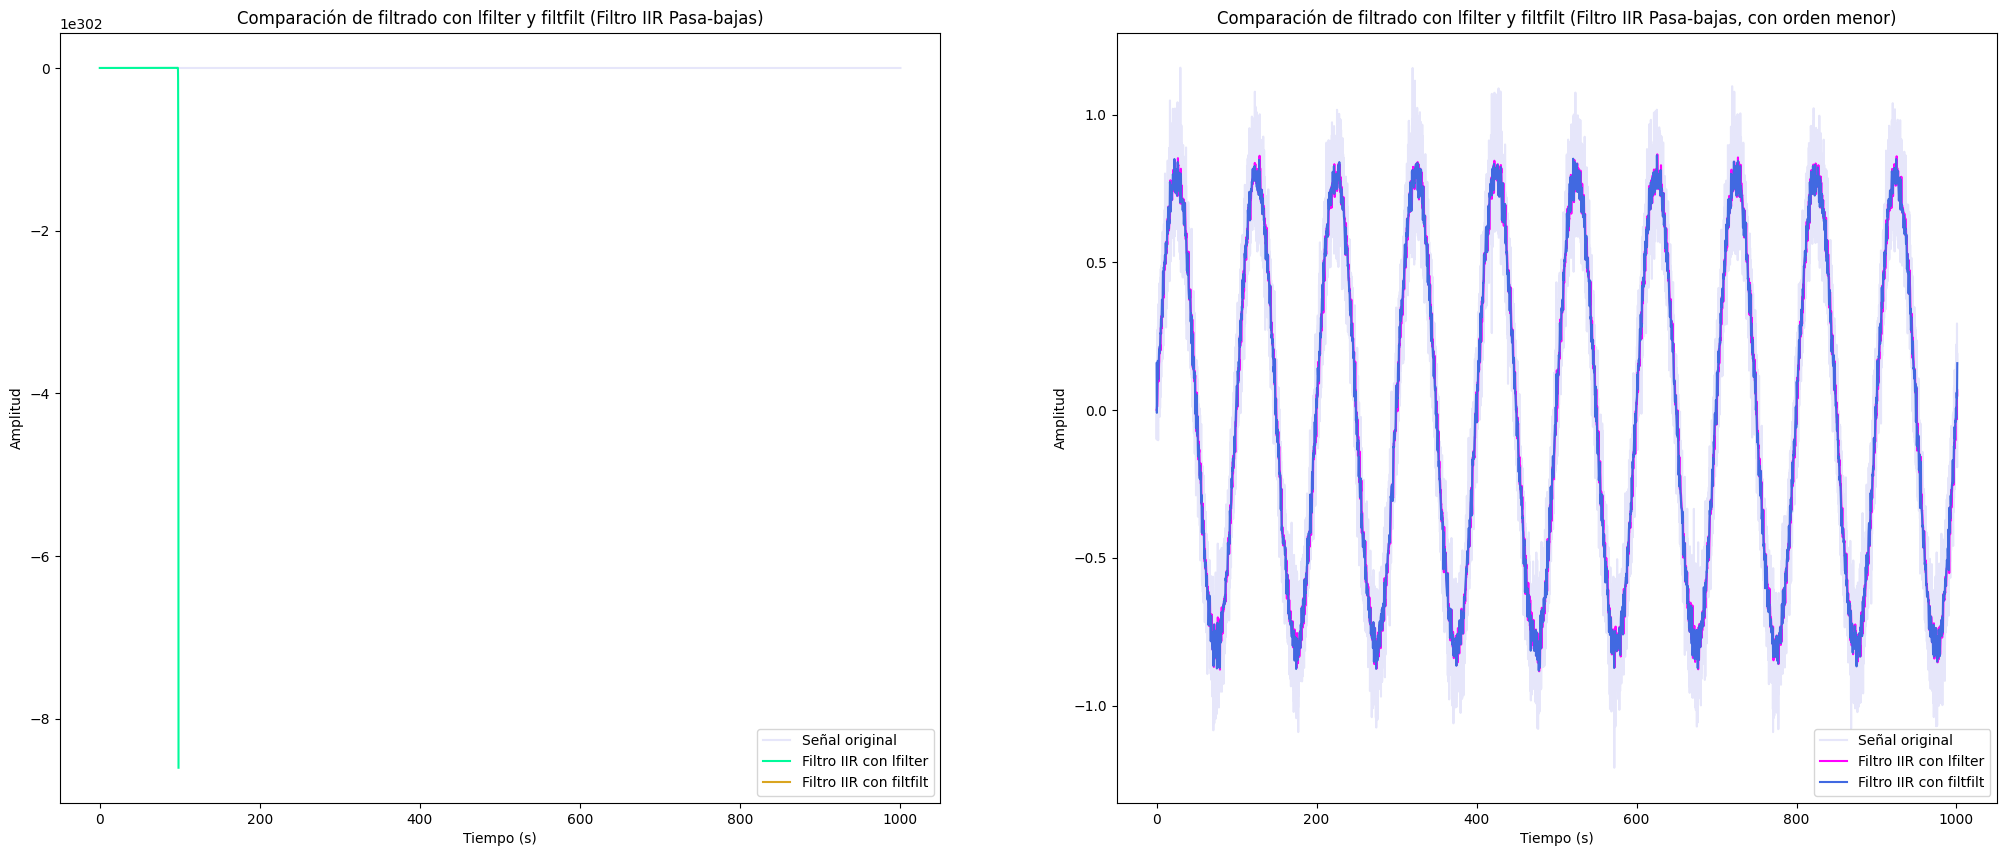

In [289]:
order = 30 # Orden inicial del filtro
Fc_low = 1.25  # Frecuencia de corte en Hz
nyquist = Fs / 2
wn_low = Fc_low / nyquist

# Diseño del filtro IIR pasa-bajas (Butterworth)
b, a = signal.iirfilter(order, wn_low, btype='low', ftype='butter')

# Aplicación de los filtros con lfilter y filtfilt

y_e_lfilter = scipy.signal.lfilter(b, a, x=y_e)
y_e_filtfilt= signal.filtfilt(b,a=a,x=y_e)
# Graficamos los resultados
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(n, y_e, label="Señal original", color="lavender")
plt.plot(n, y_e_lfilter, label="Filtro IIR con lfilter", color="mediumspringgreen")
plt.plot(n, y_e_filtfilt, label="Filtro IIR con filtfilt", color="goldenrod")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Comparación de filtrado con lfilter y filtfilt (Filtro IIR Pasa-bajas)")
plt.legend()


## Ahora cambiando el orden

order1= 6
b, a = signal.iirfilter(order1, wn_low, btype='low', ftype='butter')

# Aplicación de los filtros con lfilter y filtfilt
y_e_lfilter = scipy.signal.lfilter(b, a, y_e)  # Usando lfilter
y_e_filtfilt = signal.filtfilt(b, a, y_e)  # Usando filtfilt

# Graficamos los resultados
plt.subplot(1, 2, 2)
plt.plot(n, y_e, label="Señal original", color="lavender")
plt.plot(n, y_e_lfilter, label="Filtro IIR con lfilter", color="magenta")
plt.plot(n, y_e_filtfilt, label="Filtro IIR con filtfilt", color="royalblue")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Comparación de filtrado con lfilter y filtfilt (Filtro IIR Pasa-bajas, con orden menor)")
plt.legend()
plt.show()



*   *¿Por que se usa denominador y numerador?* .

Los filtros IIR, usan tanto el numerador (b) como el denominador (a) para definir la respuesta del filtro. Estos coeficientes representan las relaciones de retroalimentación o salidas y entrada del filtro, las cuales se usan para poder saber son la respuesta al impulso infinita. Esto significa que la salida del filtro depende no solo de las muestras de entrada actuales, sino también de las salidas anteriores (es decir, retroalimentación).
*   *¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice*.

Sí, los filtros IIR de orden alto pueden presentar problemas de estabilidad y causar amplificaciones no deseadas, especialmente al utilizar `filtfilt`, debido a la retroalimentación y al mayor número de coeficientes. Además, es importante considerar los rangos de frecuencia en los que se desea trabajar, ya que si la frecuencia fundamental es muy baja, un orden elevado podría afectar negativamente el filtrado de la señal. Es recomendable ser cauteloso al usar órdenes altos en filtros IIR, ya que pueden distorsionar la señal de manera significativa[7] [8].



**1.4 Aplicación**

Para observar el efecto de los filtros, se carga la señal del canal 1 desde el archivo señal_filtros.txt, que fue adquirida a una frecuencia de muestreo de 500 Hz.

***Cargado de archivos .txt***





In [245]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Laboratorio P6_Diseño de filtros/senal_filtros.txt'
data = pd.read_csv(file_path,sep='\t')
print(data.keys)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.keys of        -7.0306  -3.5899  -2.7995  -6.8884   0.9126  -6.7908   4.3411   6.5558  \
0      -7.0157  -3.5755  -2.7809  -6.8658   0.9288  -6.7672   4.3691   6.5822   
1      -7.0426  -3.6058  -2.7972  -6.8852   0.9068  -6.7855   4.3449   6.5713   
2      -7.0599  -3.6356  -2.8107  -6.8951   0.8900  -6.8084   4.3239   6.5683   
3      -7.0538  -3.6399  -2.7953  -6.8751   0.9060  -6.7994   4.3398   6.5981   
4      -7.0886  -3.6888  -2.8232  -6.9009   0.8799  -6.8286   4.3162   6.5856   
...        ...      ...      ...      ...      ...      ...      ...      ...   
59994  -7.5477  -3.7738  -3.0120  -6.9647   0.9116  -6.7962   4.3393   6.5189   
59995  -7.5477  -3.7693  -3.0032  -6.9557   0.9126  -6.7922   4.3603   6.5391   
59996  -7.5644  -3.7805  -3.0125  -6.9695   0.8959  -6.7994   4.3417   6.5367   
59997  -7.5477  -3.7574  -2.989

Solo utilizaremos el canal 1 de la señal.

In [246]:
senal_c1=data.iloc[:,0]

In [247]:
print(senal_c1.size)

59999


In [248]:
Fsc1=500 # Frecuencia de muestreo.
duracion=senal_c1.size/Fsc1  # Duración de la señal
print(duracion)

119.998



**Número total de muestras** = 59999

**Frecuencia de muestreo** = 500 Hz

**Duración de la señal** = 119.9 segundos


***Creación del vector de tiempo***

Para crear el vector de tiempo, se construye un vector que inicie en 0 y vaya hasta 119.9 con un paso de 1/Fs, que corresponde al periodo de la señal.

In [249]:
time=np.arange(0,duracion,1/Fsc1)

In [250]:
time.shape

(59999,)

***Gráfico de la señal sin filtrar***

Se aplica la función detrend a la señal para eliminar su tendencia lineal, es decir, el offset, mejorando así la precisión del análisis.








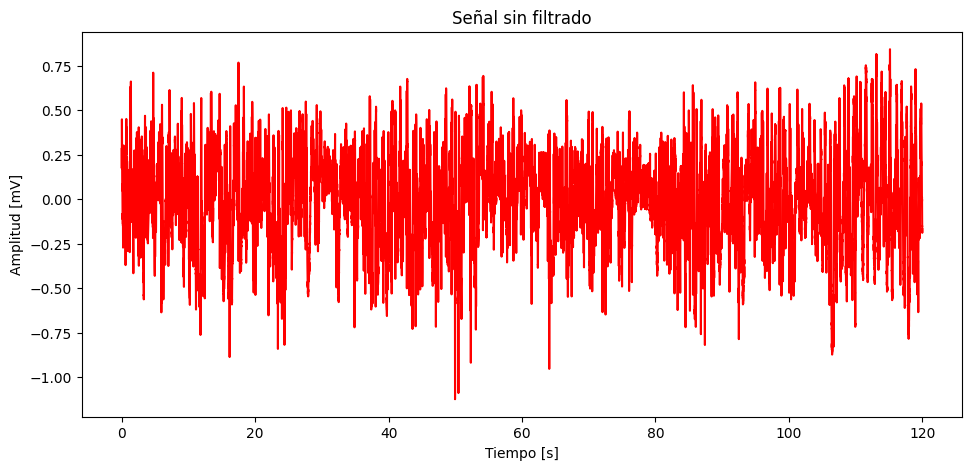

In [251]:
from scipy.signal import detrend
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title('Señal sin filtrado')
senal_c1 = detrend(senal_c1)
plt.plot(time,senal_c1, color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.show()

***Periodograma de Welch de la señal sin filtrar***

Para realizar un análisis espectral de la señal sin filtrar, se emplea un periodograma de Welch, que ofrece información sobre la distribución de la potencia de la señal en el dominio de la frecuencia.

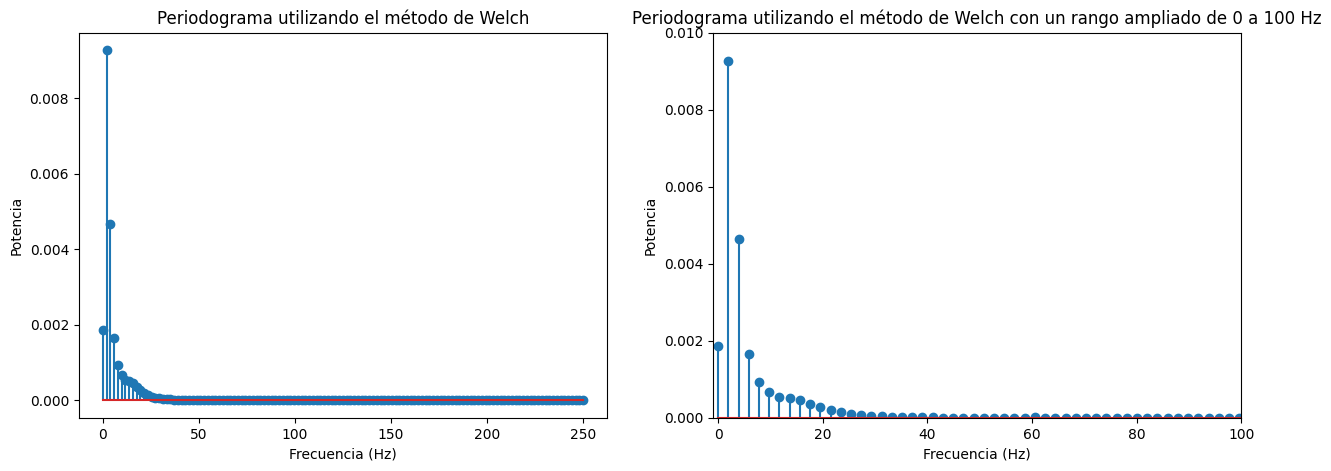

In [252]:

# Calcular la longitud de la señal
len_signal = len(senal_c1)
# Ajustar nperseg según la longitud de la señal
nperseg = min(256, len_signal)  # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, pxx = welch(senal_c1, Fsc1, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch")
# Acercamiento
plt.subplot(1,2,2)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch con un rango ampliado de 0 a 100 Hz")
plt.xlim([-1,100])
plt.ylim([0,0.01])
plt.show()

En el periodograma se observa que no hay una potencia significativa de la señal a frecuencias superiores a aproximadamente 25 Hz. Esto indica que no se presenta ruido eléctrico, el cual suele encontrarse a una frecuencia de 60 Hz. Por lo tanto, se puede concluir que la señal ha sido procesada previamente para eliminar el ruido a altas frecuencias.

***Filtro FIR Pasa-Banda***

En el periodograma de Welch de la señal filtrada, se observó que la potencias de mayor magnitud de la señal se encuentra aproximadamente en el rango de frecuencia de 1 a 5 Hz. Por esta razón, se aplicó un filtro pasa banda FIR a la señal sin filtrar, de modo que solo se permita un rango de frecuencias con una frecuencia de corte inferior de 1 Hz y una frecuencia de corte superior de 5 Hz. Además, se incrementó el orden del filtro para mejorar la atenuación de las frecuencias no deseadas, ya que un mayor orden resulta en una mayor atenuación y, por ende, una transición más abrupta entre las bandas pasantes y atenuadas. Sin embargo, es importante considerar que un aumento excesivo en el orden del filtro puede afectar la linealidad de la fase.

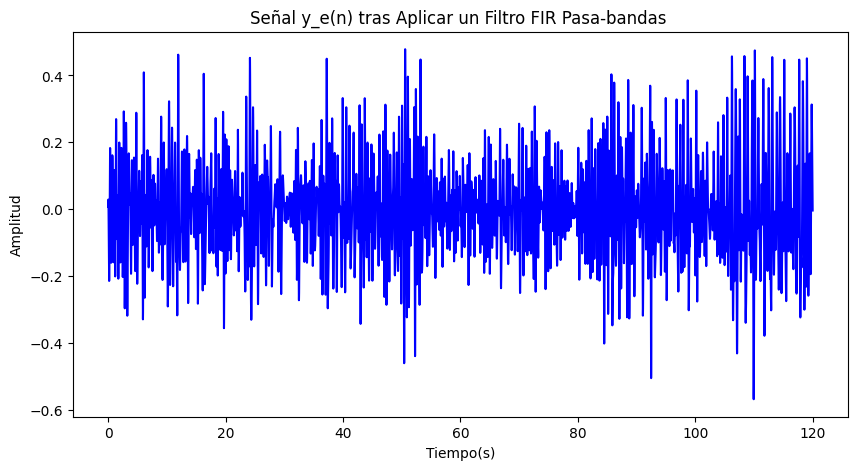

In [253]:
order = 500 # Orden
Fci2 = 1  # Frecuencia de corte inferior
Fcs2 = 5  # Frecuencia de corte superior
nyquist = Fsc1 / 2  # Frecuencia de nyquist
wni2 = Fci2/ nyquist  # Frecuencia de corte normalizada inferior
wns2 = Fcs2 / nyquist  # Frecuencia de corte normalizada superior

# Filtro pasa-bandas
bandpassc1 = signal.firwin(order + 1, [wni2, wns2], pass_zero=False, window="hamming")

# Aplicación del filtro
senal_c1_bandpass = signal.filtfilt(b= bandpassc1, a=1, x=senal_c1)  # Aplicación del filtro

# Graficamos
plt.figure(figsize=(10, 5))
plt.plot(time, senal_c1_bandpass, color='blue')
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Señal y_e(n) tras Aplicar un Filtro FIR Pasa-bandas ")
plt.show()

***Periodograma de Welch de la señal filtrada***

Para llevar a cabo un análisis espectral de la señal filtrada, se utiliza nuevamente el periodograma de Welch, lo que permite visualizar cómo la aplicación del filtro ha afectado la potencia de la señal en el dominio de la frecuencia.

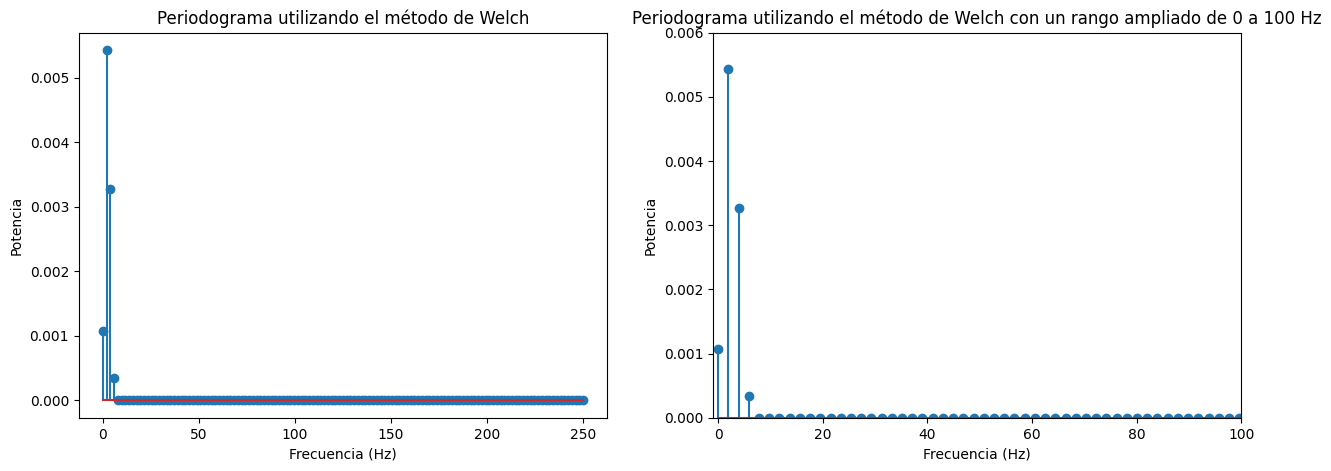

In [254]:
# Calcular la longitud de la señal
len_signal = len(senal_c1_bandpass)
# Ajustar nperseg según la longitud de la señal
nperseg = min(256, len_signal)  # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, pxx = welch(senal_c1_bandpass, Fsc1, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch")
# Acercamiento
plt.subplot(1,2,2)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch con un rango ampliado de 0 a 100 Hz")
plt.xlim([-1,100])
plt.ylim([0,0.006])
plt.show()


Tras aplicar el filtro, el periodograma de Welch muestra claramente una atenuación de las frecuencias fuera del rango definido por las frecuencias de corte inferior y superior del filtro pasa banda, logrando una reducción significativa del ruido de baja frecuencia, como era esperado. Esto permite obtener una señal de salida más cercana a la señal de interés, reduciendo el ruido introducido en el momento de su adquisición.

***Comparación entre la señal sin filtrar y la señal después de aplicar un filtro FIR pasa-bandas***

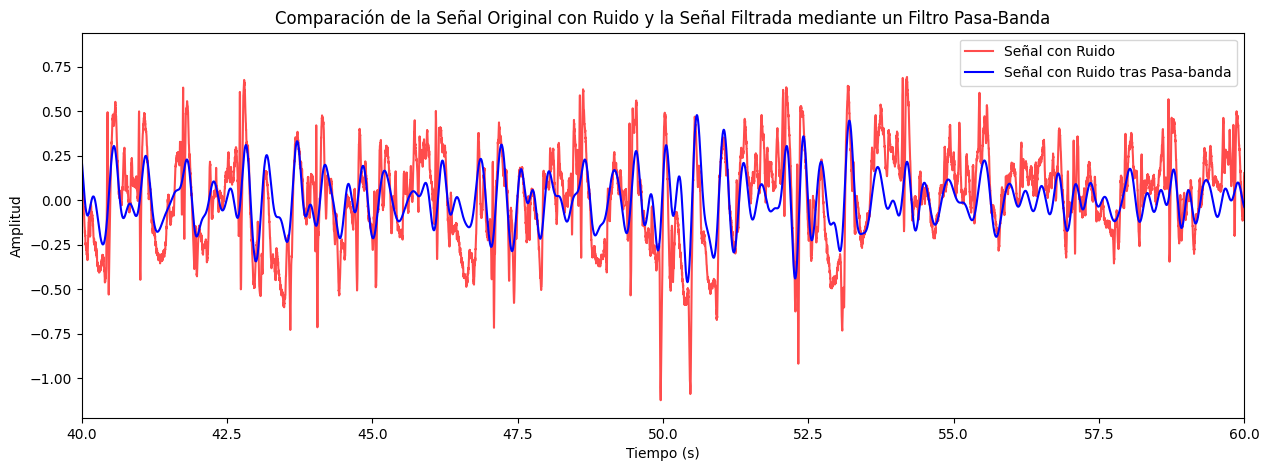

In [255]:
plt.figure(figsize=(15,5))
plt.plot(time, senal_c1, label='Señal con Ruido ', color='red', alpha=0.7)
plt.plot(time,senal_c1_bandpass, label='Señal con Ruido tras Pasa-banda', color='blue')
plt.title('Comparación de la Señal Original con Ruido y la Señal Filtrada mediante un Filtro Pasa-Banda')
plt.xlabel('Tiempo (s)')
plt.xlim([40,60])
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Al comparar la señal original con ruido y la señal filtrada, se observa una disminución en la amplitud de la señal filtrada. Esto indica que el filtro pasa banda logra eliminar eficazmente las frecuencias no deseadas, reduciendo significativamente el ruido en la señal de interés. Esta reducción es crucial para mejorar la calidad de la señal y facilitar su análisis posterior.

Asimismo, al aumentar el orden del filtro, se aprecia una mayor precisión en la atenuación de las frecuencias no deseadas, lo que permite una mejor recuperación de la señal de interés. Es importante mencionar que, al utilizar el comando filtfilt, se logra mantener una fase lineal, eliminando así cualquier retardo de fase que podría haber afectado la señal filtrada. Sin embargo, como se ha señalado anteriormente, un orden muy alto puede introducir efectos indeseados. En este caso, no se observa un cambio significativo en la fase de la señal, lo que sugiere que se eligió un orden adecuado. Además, fue acertado optar por un filtro de tipo FIR, que ofrece una respuesta de fase lineal y, por lo tanto, mantiene la forma de la señal.

**1.5 Conclusiones**

* En el procesamiento del canal 1 de la señal contenida en "señal_filtros.txt", la aplicación del filtro pasa banda ha demostrado ser eficaz en la eliminación de frecuencias no deseadas, lo que ha llevado a una reducción significativa del ruido en la señal de interés, además de mantener la fase lineal. Esta mejora es esencial para optimizar la calidad de los datos y garantizar un análisis más preciso y confiable.


* La utilización de filtros digitales para el procesamiento de señales se presenta como una herramienta muy efectiva para obtener la señal de interés, eliminando eficazmente el ruido introducido durante su adquisición. A diferencia de los filtros convencionales, los filtros digitales no están sujetos a interferencias externas, como las producidas por campos magnéticos o eléctricos, ni al ruido inherente de los componentes activos presentes en los sistemas de instrumentación analógica. Esto garantiza una mejora significativa en la calidad de la señal procesada.

* los filtros digitales permiten utilizar órdenes más altos, lo que mejora la atenuación y reduce la transición entre las bandas de paso y de rechazo. En la práctica, la producción de filtros con órdenes tan elevados en sistemas analógicos sería muy costosa, lo que resalta aún más las ventajas de utilizar filtros digitales en el procesamiento de señales.


*   Al utilizar un filtro, es esencial comprender el funcionamiento de sus parámetros y ajustarlos adecuadamente, ya que tanto la frecuencia de corte como el orden del filtro son factores críticos que deben configurarse con precisión para preservar la señal útil. Esto es especialmente importante en los filtros IIR, donde un cambio en el orden puede afectar significativamente el resultado. Por ello, se recomienda utilizar órdenes bajos o medios para evitar problemas de estabilidad.






**1.6 Referencias**


1. “10. Filtros — PySDR: A Guide to SDR and DSP using Python.” https://pysdr.org/es/content-es/filters.html
2.   Hoang Duong Tuan, T. T. Son, P. Apkarian and T. Q. Nguyen, "Low-order IIR filter bank design," in IEEE Transactions on Circuits and Systems I: Regular Papers, vol. 52, no. 8, pp. 1673-1683, Aug. 2005, doi: 10.1109/TCSI.2005.851673.
keywords: {IIR filters;Finite impulse response filter;Filter bank;Image reconstruction;Riccati equations;Design optimization;Focusing;Mirrors;Adders;Infinite-impulse response (IIR) filter bank;linear-matrix inequality (LMI)},


3.  “firwin — SciPy v1.14.1 Manual.” https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html
4. “filtfilt — SciPy v1.14.1 Manual.” https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

5. “lfilter — SciPy v1.14.1 Manual.” https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

6. “Applying filter in scipy.signal: Use lfilter or filtfilt?,” Signal Processing Stack Exchange. https://dsp.stackexchange.com/questions/19084/applying-filter-in-scipy-signal-use-lfilter-or-filtfilt

7. S. Pröll, “Applying digital filters in Python,” My cool site, Apr. 06, 2022. https://www.samproell.io/posts/yarppg/digital-filters-python/
8. “¿Cuáles son las características clave de los filtros IIR?,” www.linkedin.com, Dec. 16, 2023. https://es.linkedin.com/advice/0/what-key-features-iir-filters-skills-electrical-design-sluie?lang=es
